<a href="https://colab.research.google.com/github/PabloStrapasson/TCC-classifica-o-de-texto/blob/main/classificacao_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import de bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

# Deep learning
!pip3 install ktrain

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 22.3 MB 85.5 MB/s 
     |████████████████████████████████| 981 kB 73.3 MB/s 
     |████████████████████████████████| 263 kB 62.9 MB/s 
     |████████████████████████████████| 2.8 MB 16.6 MB/s 
     |████████████████████████████████| 1.2 MB 66.1 MB/s 
     |████████████████████████████████| 468 kB 65.5 MB/s 
     |████████████████████████████████| 67 kB 3.6 MB/s 
     |████████████████████████████████| 3.3 MB 58.6 MB/s 
     |████████████████████████████████| 895 kB 54.2 MB/s 
     |████████████████████████████████| 596 kB 59.8 MB/s 
  Created wheel for ktrain: filename=kt

#Import do conjunto de dados 

In [ ]:
#V1: https://docs.google.com/spreadsheets/d/1-0dX1_7wQTCBedP2npTlIw0MEB6F-ou9/edit#gid=169450423
#V2: https://docs.google.com/spreadsheets/d/1ct5U9y08C7q4VYUIXMeMqoIwZz-nQHZmRWcX7z2XR20/edit#gid=552648308

dataset = pd.read_excel("/content/classificacao_topicos_2kapps_V4.xlsx")
dataset

,ID,nome_arquivo_pc,nome_app,topico link,comentarios,todo_texto_app,texto_app_substantivos
0,1.0,InfoCarvalhal.aia,InfoCarvalhau,Educação,NaN,Screen2 CARREGANDO ALMIRANTE CARVALHAL Começ...,ano turno menu horários alunos professores nas...
1,2.0,quadroVerde.aia,quadroverde,Educação,NaN,None Screen1 CROP CROP None Viewer Galeria j...,galeria disciplina favor nome autor quadro ver...
2,3.0,ReciclaMais.aia,reciclamaisv2,Meio ambiente,NaN,Senha CPF não encontrado Senha Senha Cpf Scr...,senha login texto nome email cidade rua bairro...
3,4.0,ConexaoEsportiva.aia,ConexaoEsportiva,Vida saudável e esporte,NaN,Dashboard Dashboard Criar Prática Data _ _ /...,prática data endereço valor modalidade futebol...
4,5.0,AppNoelNovoDesign.aia,AppNoelNovoDesign,Comunicação,NaN,"0 0 Screen4 Screen3 geo:0,0?q= , Local Local...",local localização mapa carta perfil foto galer...
...,...,...,...,...,...,...,...
2852,2873.0,TabletopAssistant.aia,MeuProjeto2,NaN,jogo,dice_list dice_list dice_list dice_list MeuPro...,NaN
2853,2874.0,FloripaSolidaria.aia,FloripaSolidaria,Cidadania e questões sociais,NaN,FloripaSolidaria Home Menu Floripa Solidária A...,NaN
2854,2875.0,TemAglomero.aia,TemAglomeroApp,Comes-e-bebes,medicina e saúde? boa pergunta..se incluimos e...,Tem Aglomero? Tem Aglomero? bar Bar cafeteria ...,NaN
2855,2876.0,INFRASTAT.aia,INFRASTATv2,NaN,desconsiderado por enquanto - acho que e manut...,visita manutencao historico Patrimonio deve te...,NaN


###Definição de variáveis

In [ ]:
#colunas existentes
col_texto_bruto = 'todo_texto_app'
col_topico = 'topico link'
col_texto_processado = 'texto_processado'

#colunas que serão criadas
col_topico_ID = 'topicoID'

###Retirando se tiver algum app sem texto de conteúdo OU tópico alocado

In [ ]:
dataset.dropna(subset=[col_texto_bruto], inplace=True)
dataset.dropna(subset=[col_topico], inplace=True)
dataset

,ID,nome_arquivo_pc,nome_app,topico link,comentarios,todo_texto_app,texto_app_substantivos
0,1.0,InfoCarvalhal.aia,InfoCarvalhau,Educação,NaN,Screen2 CARREGANDO ALMIRANTE CARVALHAL Começ...,ano turno menu horários alunos professores nas...
1,2.0,quadroVerde.aia,quadroverde,Educação,NaN,None Screen1 CROP CROP None Viewer Galeria j...,galeria disciplina favor nome autor quadro ver...
2,3.0,ReciclaMais.aia,reciclamaisv2,Meio ambiente,NaN,Senha CPF não encontrado Senha Senha Cpf Scr...,senha login texto nome email cidade rua bairro...
3,4.0,ConexaoEsportiva.aia,ConexaoEsportiva,Vida saudável e esporte,NaN,Dashboard Dashboard Criar Prática Data _ _ /...,prática data endereço valor modalidade futebol...
4,5.0,AppNoelNovoDesign.aia,AppNoelNovoDesign,Comunicação,NaN,"0 0 Screen4 Screen3 geo:0,0?q= , Local Local...",local localização mapa carta perfil foto galer...
...,...,...,...,...,...,...,...
2850,2871.0,Recicleplus.aia,MeuProjeto3,Meio ambiente,NaN,Lixo1 Lixo2 Lixo3 Lixo4 Lixo5 Lixo6 Hoje Ultim...,NaN
2851,2872.0,Onde_andas.aia,Onde_andas_final,Turismo e geografia,?,Beira mar Norte Beira mar Continental Trindade...,NaN
2853,2874.0,FloripaSolidaria.aia,FloripaSolidaria,Cidadania e questões sociais,NaN,FloripaSolidaria Home Menu Floripa Solidária A...,NaN
2854,2875.0,TemAglomero.aia,TemAglomeroApp,Comes-e-bebes,medicina e saúde? boa pergunta..se incluimos e...,Tem Aglomero? Tem Aglomero? bar Bar cafeteria ...,NaN


## Contagem de valores das categorias

In [ ]:
dataset[col_topico].value_counts()

Matemática                                   223
Vida saudável e esporte                      174
Comunicação                                  165
Entretenimento                               115
Turismo e geografia                          103
Comes-e-bebes                                 96
Educação                                      82
Produtividade                                 60
Construção, casa e lar                        59
Adivinhação e fortuna                         53
Engenharia e física                           50
Finanças                                      49
Ferramentas do celular                        45
Animais e pets                                42
Cidadania e questões sociais                  39
Espiritualidade, filosofia e auto-ajuda       39
Automóveis, veículos e transporte             36
Design e pintura                              34
Medicina e saúde                              29
Revistas, notícias, livros ou dicionários     21
Trabalho            

##Converter o nome das categorias em índice numérico

In [ ]:
# # Associe os nomes das categorias com o índice numérico e salve-o na nova coluna TopicoId
target_category = dataset[col_topico].unique()
print(target_category)

['Educação' 'Meio ambiente' 'Vida saudável e esporte' 'Comunicação'
 'Medicina e saúde' 'Turismo e geografia' 'Comes-e-bebes'
 'Construção, casa e lar' 'Cidadania e questões sociais'
 'Automóveis, veículos e transporte' 'Produtividade' 'Trabalho'
 'Engenharia e física' 'Animais e pets' 'Botânica' 'Tempo e meteorologia'
 'Finanças' 'Revistas, notícias, livros ou dicionários' 'Entretenimento'
 'Ferramentas do celular' 'Maternidade e paternidade' 'Design e pintura'
 'Adivinhação e fortuna' 'Matemática'
 'Espiritualidade, filosofia e auto-ajuda' 'Beleza e moda' 'Fotografia']


In [ ]:
dataset[col_topico_ID] = dataset[col_topico].factorize()[0]
dataset.head()

,ID,nome_arquivo_pc,nome_app,topico link,comentarios,todo_texto_app,texto_app_substantivos,topicoID
0,1.0,InfoCarvalhal.aia,InfoCarvalhau,Educação,NaN,Screen2 CARREGANDO ALMIRANTE CARVALHAL Começ...,ano turno menu horários alunos professores nas...,0
1,2.0,quadroVerde.aia,quadroverde,Educação,NaN,None Screen1 CROP CROP None Viewer Galeria j...,galeria disciplina favor nome autor quadro ver...,0
2,3.0,ReciclaMais.aia,reciclamaisv2,Meio ambiente,NaN,Senha CPF não encontrado Senha Senha Cpf Scr...,senha login texto nome email cidade rua bairro...,1
3,4.0,ConexaoEsportiva.aia,ConexaoEsportiva,Vida saudável e esporte,NaN,Dashboard Dashboard Criar Prática Data _ _ /...,prática data endereço valor modalidade futebol...,2
4,5.0,AppNoelNovoDesign.aia,AppNoelNovoDesign,Comunicação,NaN,"0 0 Screen4 Screen3 geo:0,0?q= , Local Local...",local localização mapa carta perfil foto galer...,3


Mostrar nome da categoria e o respectivo ID da categoria

In [ ]:
# Crie um novo dataframe "topico", que tenha apenas categorias exclusivas,
# também classificando essa lista em ordem de valores de topicoId
topico = dataset[[col_topico, col_topico_ID]].drop_duplicates().sort_values(col_topico_ID)
topico

,topico link,topicoID
0,Educação,0
2,Meio ambiente,1
3,Vida saudável e esporte,2
4,Comunicação,3
5,Medicina e saúde,4
6,Turismo e geografia,5
8,Comes-e-bebes,6
9,"Construção, casa e lar",7
12,Cidadania e questões sociais,8
16,"Automóveis, veículos e transporte",9


#Pré-processamento

##Remover caracteres especiais (números, _, /)

In [ ]:
def caracteres_especiais(textString):
    try:
        textString = textString.replace("_", " ") #remoção de underline
        textString = re.sub(r'[0-9]', " ", textString) #remoção de números
        textString = textString.replace("/", " ") #remoção de barra
        return textString
    except:
        print('=====Problema na remoção de caracteres especiais.=====')
        print(textString)
        print('=====')
        return

#Primeiro copiando o texto bruto para a coluna de processamento de texto
dataset[col_texto_processado] = dataset[col_texto_bruto]

dataset[col_texto_processado] = dataset[col_texto_processado].apply(caracteres_especiais)
dataset[col_texto_processado][1]

'  None Screen  CROP CROP None Viewer Galeria jkbjhb Text for Label   ic info.png Sobre ic exit.png Sair ic folder.png ic x.png ic edit.png Galeria Adicionar disciplina None  Usabilidade ADICIONAR CANCELAR #       #D D D  Excluir disciplina EXCLUIR CANCELAR ic delete.png None Disciplina " " adicionada! Disciplina " " já cadastrada. Por favor, utilize outro nome. Disciplina já existente OK Sobre Autor: Diogo F N Machado QuadroVerde v .  OK Sair QuadroVerde Quadro Verde Versão  .  Diogo F. N. Machado     QuadroVerde     Recentes                   Disciplinas  Galeria Viewer x'

##Conversão para letra minúscula

In [ ]:
def convert_lower(text):
    try:
        return text.lower()
    except:
        print('=====Problema na conversão.=====')
        print(text)
        print('=====')

dataset[col_texto_processado] = dataset[col_texto_processado].apply(convert_lower)
dataset[col_texto_processado][1]

'  none screen  crop crop none viewer galeria jkbjhb text for label   ic info.png sobre ic exit.png sair ic folder.png ic x.png ic edit.png galeria adicionar disciplina none  usabilidade adicionar cancelar #       #d d d  excluir disciplina excluir cancelar ic delete.png none disciplina " " adicionada! disciplina " " já cadastrada. por favor, utilize outro nome. disciplina já existente ok sobre autor: diogo f n machado quadroverde v .  ok sair quadroverde quadro verde versão  .  diogo f. n. machado     quadroverde     recentes                   disciplinas  galeria viewer x'

##Remover todas as Stopwords
Removido:
- Tudo que não é substantivo
```
 https://docs.google.com/spreadsheets/d/1Mb4samGnzGKgjsIvw-SYH3N657D3WX8y/edit?rtpof=true#gid=1208239951
```
- Tudo que é stopword de aplicativo
- Tudo que não tenha tamanho >= 2

In [ ]:
#link: https://docs.google.com/spreadsheets/d/1Mb4samGnzGKgjsIvw-SYH3N657D3WX8y/edit?rtpof=true#gid=1208239951
df_stop_words = pd.read_excel("/content/universo_substantivos_portugues+palavroes+antieticos.xlsx")

def remove_stopwords(text):
    try:
        stop_words = set(df_stop_words['substantivo'])
        words = word_tokenize(text)
        texto_processado = ' '.join([x for x in words if x in stop_words])
        if texto_processado:
            return texto_processado
        else:
            return None
    except:
        print('=====Problema na remoção.=====')
        print(text)
        print('=====')

dataset[col_texto_processado] = dataset[col_texto_processado].apply(remove_stopwords)
dataset[col_texto_processado][1]

'galeria galeria disciplina disciplina disciplina disciplina disciplina existente autor quadro disciplinas galeria'

##Retirando se tiver algum app sem texto após pré-processamento

In [ ]:
#Verificando se há NAs
dataset.isna().sum()

ID                           0
nome_arquivo_pc              0
nome_app                     0
topico link                  0
comentarios               1505
todo_texto_app               0
texto_app_substantivos     117
topicoID                     0
texto_processado             0
dtype: int64

In [ ]:
dataset.dropna(subset=[col_texto_processado], inplace=True)

#Análise Exploratória de Dados

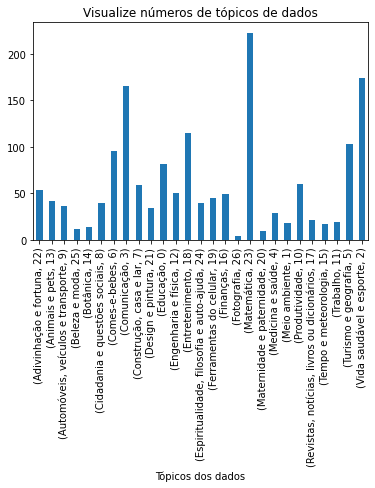

In [ ]:
dataset.groupby(col_topico).topicoID.value_counts().plot(kind = "bar")
plt.xlabel("Tópicos dos dados")
plt.title("Visualize números de tópicos de dados")
plt.show()

##Visualizando palavras relacionadas aos tópicos

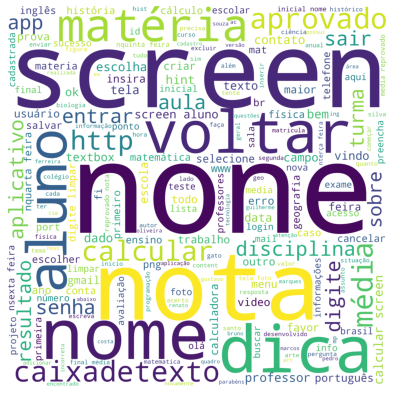

In [ ]:
#Via WordCloud
from wordcloud import WordCloud

stop = set(stopwords.words('portuguese'))

def remove_duplicated_words(text):
    return ' '.join(set(word_tokenize(text)))

def wordcloud_draw(dataset, color = 'white'):
    dataset_ = pd.DataFrame(dataset.copy())
    dataset_[col_texto_processado] = dataset_[col_texto_processado].apply(remove_duplicated_words)
    dataset_ = dataset_[col_texto_processado]
    try:
        words = ' '.join(dataset_)
        cleaned_word = ' '.join([word for word in words.split()])
        wordcloud = WordCloud(stopwords = stop, background_color = color,
                            width = 2500, height = 2500).generate(cleaned_word)
        plt.figure(1, figsize = (10,7))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
    except Exception as e:
        print('=====Problema na criação do wordcloud.=====')
        print(e)
    
id_topico_escolhido = 0
dataset_topico_escolhido = dataset[dataset[col_topico_ID] == id_topico_escolhido]
dataset_topico_escolhido = dataset_topico_escolhido[col_texto_processado]
wordcloud_draw(dataset_topico_escolhido)

In [ ]:
#Via frequências

#opção para mostrar todas as linhas e não truncar
pd.set_option('display.max_rows', 10000)

def most_frequent_word_topic(dataset, topico):
    df_freq = dataset.copy()
    df_freq[col_texto_processado] = df_freq[col_texto_processado].apply(remove_duplicated_words)
    df_freq[col_texto_processado] = df_freq[col_texto_processado].apply(word_tokenize)
    df_freq = pd.DataFrame(df_freq.assign(content=df_freq[col_texto_processado].str.split()).explode(col_texto_processado).groupby(col_topico,sort=False)[col_texto_processado].value_counts())
    df_freq_escolhido = df_freq.loc[(topico)].nlargest(10, col_texto_processado)
    return df_freq_escolhido
    
most_frequent_word_topic(dataset, "Educação")

,texto_processado
texto_processado,
screen,52
:,42
a,41
de,40
none,39
para,38
do,30
.,29
",",28


In [ ]:
#https://medium.com/mlearning-ai/disastrous-tweets-classification-using-bert-ceb8e7be6c36

#Declaração da variável dependente e independente

In [ ]:
x = dataset[col_texto_processado]
y = dataset[col_topico_ID]

##Criar e ajustar o modelo de saco de palavras

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
y = np.array(dataset.topicoID.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.texto_processado).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1607, 5000)
y.shape =  (1607,)


In [ ]:
y

array([ 0,  0,  1, ...,  8,  6, 13])

#Conjunto de treino

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1124
483


#Criar lista vazia

In [ ]:
#create list of model and accuracy dicts
perform_list = [ ]

#Crie, ajuste e preveja todos os modelos de ML

In [ ]:
def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
   
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    # Add performance parameters to list
    perform_list.append(dict([
                              ('Model', model_name),
                              ('Test Accuracy', round(accuracy, 2)),
                              ('Precision', round(precision, 2)),
                              ('Recall', round(recall, 2)),
                              ('F1', round(f1score, 2))
                              ]))

##Regressão logística

In [ ]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 66.25
Precision : 0.6625258799171843
Recall : 0.6625258799171843
F1-score : 0.6625258799171843


##Random Forest

In [ ]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 66.25
Precision : 0.6625258799171843
Recall : 0.6625258799171843
F1-score : 0.6625258799171843


##Multinomial Naive Bayes

In [ ]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 67.7
Precision : 0.6770186335403726
Recall : 0.6770186335403726
F1-score : 0.6770186335403726


##Support Vector Machine

In [ ]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 64.39
Precision : 0.6438923395445134
Recall : 0.6438923395445134
F1-score : 0.6438923395445134


##Decision Tree

In [ ]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 55.07
Precision : 0.5507246376811594
Recall : 0.5507246376811594
F1-score : 0.5507246376811594


##KNN

In [ ]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 44.1
Precision : 0.4409937888198758
Recall : 0.4409937888198758
F1-score : 0.4409937888198758


##Gaussian Naive Bayes

In [ ]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 44.1
Precision : 0.4409937888198758
Recall : 0.4409937888198758
F1-score : 0.4409937888198758


#Criação do Dataframe de Modelos, Acurácia, Precisão, Recall e F1


In [ ]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,66.25,0.66,0.66,0.66
1,Random Forest,66.25,0.66,0.66,0.66
2,Multinomial Naive Bayes,67.70,0.68,0.68,0.68
3,Support Vector Classifer,64.39,0.64,0.64,0.64
4,Decision Tree Classifier,55.07,0.55,0.55,0.55
5,K Nearest Neighbour,44.10,0.44,0.44,0.44
6,Gaussian Naive Bayes,44.10,0.44,0.44,0.44


#Best Model to Perform Accuracy Score

In [ ]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value)

The best accuracy of model is 63.32


#Ajustar e prever o melhor modelo de ML

In [ ]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)
y_pred

array([20, 16, 16, 24, 18, 12, 12, 14,  1,  7, 15, 16, 15, 16, 14, 12,  6,
       24, 22, 16, 24, 16, 15, 14, 16, 25, 25,  2,  7, 24, 14,  1, 12, 14,
       12, 18, 22, 11,  0,  6, 16, 20, 12,  7, 14,  8,  9,  6, 11, 13,  0,
       16, 16,  6, 23, 16,  3, 22, 24, 20, 16,  7, 16, 16,  5, 16, 16, 16,
       15, 14,  7, 16,  6,  7,  8, 12,  7, 25,  0,  6, 10, 18, 16, 11, 16,
        0, 12, 16,  2, 24,  8, 24,  8, 24, 24,  6, 16, 25, 14, 12,  3, 14,
        6,  7,  6,  1,  0, 25, 16, 21, 16, 24, 16, 16, 24, 24, 24,  8, 11,
       14, 15, 16, 24,  6, 12, 24,  6,  8,  3, 16, 24, 13, 12,  2, 16,  2,
        9, 24,  7,  7, 23,  3,  5, 23, 24, 16, 14, 14, 14, 16, 10, 15,  6,
        5,  7,  7,  5, 10,  7, 24, 16, 16, 20, 18,  8,  5, 23,  3, 16, 14,
        8, 16, 11, 22,  8,  6, 24, 10,  2, 10,  2, 25, 12, 16, 16,  6, 15,
       16,  6, 16, 12, 15,  6, 14,  1, 20, 12,  2,  8, 16,  1, 15, 16, 16,
        0,  5, 25, 16,  8, 12, 18, 14,  7, 14, 16, 10, 11, 16,  9,  7, 16,
        6,  6, 12, 22,  1

#Predição de tópico de um novo app

In [ ]:
y_pred1 = cv.transform(['Hour ago, I contemplated retirement for a lot of reasons. I felt like people were not sensitive enough to my injuries. I felt like a lot of people were backed, why not me? I have done no less. I have won a lot of games for the team, and I am not feeling backed, said Ashwin'])
yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "Educação"
elif yy == [1]:
  result = "X"
elif yy == [2]:
  result = "Y"
elif yy == [3]:
  result = "Z"
elif yy == [1]:
  result = "A"
print(result)


#Deep Learning

In [ ]:
import ktrain
from ktrain import text

In [ ]:
#Modelos disponíveis
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


##Bert

In [ ]:
'''
#### ETAPA 1: Carregar e pré-processar o conjunto de dados
A função `texts_from_df` carregará os dados de treinamento e validação da pasta especificada e os pré-processará automaticamente de acordo com os requisitos do BERT. Ao fazer isso, o modelo e o vocabulário do BERT serão baixados automaticamente.
'''
trn, val, preproc = text.texts_from_df(dataset,
                                       text_column = col_texto_processado,
                                       label_columns = col_topico,
                                       maxlen=300, 
                                       preprocess_mode='bert', 
                                       val_pct=0.1)

['Adivinhação e fortuna', 'Animais e pets', 'Automóveis, veículos e transporte', 'Beleza e moda', 'Botânica', 'Cidadania e questões sociais', 'Comes-e-bebes', 'Comunicação', 'Construção, casa e lar', 'Design e pintura', 'Educação', 'Engenharia e física', 'Entretenimento', 'Espiritualidade, filosofia e auto-ajuda', 'Ferramentas do celular', 'Finanças', 'Fotografia', 'Matemática', 'Maternidade e paternidade', 'Medicina e saúde', 'Meio ambiente', 'Produtividade', 'Revistas, notícias, livros ou dicionários', 'Tempo e meteorologia', 'Trabalho', 'Turismo e geografia', 'Vida saudável e esporte']
      Adivinhação e fortuna  Animais e pets  \
1111                    0.0             0.0   
222                     0.0             0.0   
849                     0.0             0.0   
111                     0.0             0.0   
2677                    0.0             0.0   

      Automóveis, veículos e transporte  Beleza e moda  Botânica  \
1111                                0.0            0.

Is Multi-Label? False
preprocessing test...
language: pt


In [ ]:
'''
### ETAPA 2: Carregar um modelo BERT pré-treinado e envolvê-lo em um objeto `ktrain.Learner`
Essa etapa pode ser condensada em uma única linha de código, mas a executamos como duas linhas para maior clareza. (Você pode ignorar os avisos de descontinuação decorrentes do Keras 2.2.4 com TensorFlow 1.14.0.)
'''
model = text.text_classifier('bert', trn, preproc=preproc)
learner = ktrain.get_learner(model,train_data=trn, val_data=val, batch_size=6)

Is Multi-Label? False
maxlen is 300
done.


In [ ]:
'''
### ETAPA 3: Treinamento e ajuste do modelo no conjunto de dados
Empregamos o método `learner.fit_onecycle` no *ktrain* que emprega o uso de uma [programação de taxa de aprendizado de 1 ciclo](https://arxiv.org/pdf/1803.09820.pdf). Usamos uma taxa de aprendizado de 2e-5 com base nas recomendações do [artigo original](https://arxiv.org/abs/1810.04805).
'''
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
225/225 [==============================] - 263s 1s/step - loss: 2.5372 - accuracy: 0.3069 - val_loss: 1.9766 - val_accuracy: 0.4733


In [ ]:
learner.evaluate()

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         2
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.46      0.86      0.60         7
           7       0.36      0.56      0.43         9
           8       0.33      0.25      0.29         4
           9       0.00      0.00      0.00         5
          10       0.33      0.67      0.44         3
          11       0.67      0.50      0.57         4
          12       0.27      0.69      0.39        13
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         5
          15       0.00      0.00      0.00         3
          17       0.81      0.88      0.85        25
          18       0.00      0.00      0.00         1
          19       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  4,  0,  0, 

In [ ]:
learner.view_top_losses(n=2, preproc=preproc)

----------
id:118 | loss:6.29 | true:Maternidade e paternidade | pred:Vida saudável e esporte)

[CLS] meni ##no meni ##na mes mes meses meses meses meses meses meses meses meses meses meses meses meses meses meses meses meses meses meses meses meses meses meses meses altura peso meni ##no meni ##na idade meni ##na mes peso kg kg peso kg kg peso kg kg altura altura altura mes peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg peso kg kg altura altura altura meses peso kg kg peso kg kg 

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
'''
Testando com um valor
'''
data = 'chuva tempo previsão local GPS'
predictor.predict(data)

'Educação'

In [ ]:
!pip install git+https://github.com/amaiya/eli5@tfkeras_0_10_1

  Cloning https://github.com/amaiya/eli5 (to revision tfkeras_0_10_1) to /tmp/pip-req-build-0qqhocb0
  Running command git clone -q https://github.com/amaiya/eli5 /tmp/pip-req-build-0qqhocb0
  Running command git checkout -b tfkeras_0_10_1 --track origin/tfkeras_0_10_1
  Switched to a new branch 'tfkeras_0_10_1'
  Branch 'tfkeras_0_10_1' set up to track remote branch 'tfkeras_0_10_1' from 'origin'.
  Created wheel for eli5: filename=eli5-0.10.1-py2.py3-none-any.whl size=106895 sha256=e97290677217e70ae7d690c2fb31da18200e2f158a23950afe1e621542787490
  Stored in directory: /tmp/pip-ephem-wheel-cache-jgy0ll12/wheels/f8/8c/47/b4cafd3c9519194a489dd614ead1485899d2b34c5adc4198ff
Successfully built eli5


In [ ]:
predictor.explain(data)

##Bertimbau

In [ ]:
label_list = list(dataset[col_topico])
label_list = list(dict.fromkeys(label_list))
label_list

['Educação',
 'Meio ambiente',
 'Vida saudável e esporte',
 'Comunicação',
 'Medicina e saúde',
 'Turismo e geografia',
 'Comes-e-bebes',
 'Construção, casa e lar',
 'Cidadania e questões sociais',
 'Automóveis, veículos e transporte',
 'Produtividade',
 'Trabalho',
 'Engenharia e física',
 'Animais e pets',
 'Botânica',
 'Tempo e meteorologia',
 'Finanças',
 'Revistas, notícias, livros ou dicionários',
 'Entretenimento',
 'Ferramentas do celular',
 'Maternidade e paternidade',
 'Design e pintura',
 'Adivinhação e fortuna',
 'Matemática',
 'Espiritualidade, filosofia e auto-ajuda',
 'Beleza e moda',
 'Fotografia']

In [ ]:
'''
#### ETAPA 1: Carregar e pré-processar o conjunto de dados
A função `texts_from_df` carregará os dados de treinamento e validação da pasta especificada e os pré-processará automaticamente de acordo com os requisitos do BERT. Ao fazer isso, o modelo e o vocabulário do BERT serão baixados automaticamente.
'''
#https://huggingface.co/neuralmind/bert-large-portuguese-cased
MODEL_NAME = 'neuralmind/bert-base-portuguese-cased'
t = text.Transformer(MODEL_NAME, maxlen=300, classes=label_list)
trn, val, preproc = text.texts_from_df(dataset,
                                       text_column = col_texto_processado,
                                       label_columns = col_topico,
                                       maxlen=300, 
                                       preprocess_mode='bert', 
                                       val_pct=0.1)

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:422: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


Downloading:   0%|          | 0.00/647 [00:00<?, ?B/s]

['Adivinhação e fortuna', 'Animais e pets', 'Automóveis, veículos e transporte', 'Beleza e moda', 'Botânica', 'Cidadania e questões sociais', 'Comes-e-bebes', 'Comunicação', 'Construção, casa e lar', 'Design e pintura', 'Educação', 'Engenharia e física', 'Entretenimento', 'Espiritualidade, filosofia e auto-ajuda', 'Ferramentas do celular', 'Finanças', 'Fotografia', 'Matemática', 'Maternidade e paternidade', 'Medicina e saúde', 'Meio ambiente', 'Produtividade', 'Revistas, notícias, livros ou dicionários', 'Tempo e meteorologia', 'Trabalho', 'Turismo e geografia', 'Vida saudável e esporte']
      Adivinhação e fortuna  Animais e pets  \
557                     0.0             0.0   
952                     0.0             0.0   
710                     0.0             0.0   
1773                    0.0             0.0   
1708                    0.0             0.0   

      Automóveis, veículos e transporte  Beleza e moda  Botânica  \
557                                 0.0            0.

Is Multi-Label? False
preprocessing test...
language: pt


In [ ]:
'''
### ETAPA 2: Carregar um modelo BERT pré-treinado e envolvê-lo em um objeto `ktrain.Learner`
Essa etapa pode ser condensada em uma única linha de código, mas a executamos como duas linhas para maior clareza. (Você pode ignorar os avisos de descontinuação decorrentes do Keras 2.2.4 com TensorFlow 1.14.0.)
'''
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:431: UserWarning: The method preprocess_train was never called. You can disable this warning by setting preprocess_train_called=True.
  warnings.warn('The method preprocess_train was never called. You can disable this warning by setting preprocess_train_called=True.')
404 Client Error: Not Found for url: https://huggingface.co/neuralmind/bert-base-portuguese-cased/resolve/main/tf_model.h5
/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:1069: UserWarning: Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn('Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. ' +\


Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/210k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
'''
### ETAPA 3: Treinamento e ajuste do modelo no conjunto de dados
Empregamos o método `learner.fit_onecycle` no *ktrain* que emprega o uso de uma [programação de taxa de aprendizado de 1 ciclo](https://arxiv.org/pdf/1803.09820.pdf). Usamos uma taxa de aprendizado de 2e-5 com base nas recomendações do [artigo original](https://arxiv.org/abs/1810.04805).
'''
learner.fit_onecycle(2e-5, 1)



begin training using onecycle policy with max lr of 2e-05...
225/225 [==============================] - 224s 896ms/step - loss: 3.0122 - accuracy: 0.1712 - val_loss: 2.8959 - val_accuracy: 0.2200


##Standard

In [ ]:
#Etapa 1
trn, val, preproc = text.texts_from_df(dataset,
                                       text_column = col_texto_processado,
                                       label_columns = col_topico,
                                       maxlen=300, 
                                       preprocess_mode='standard', 
                                       val_pct=0.1)

In [ ]:
#Etapa 2
model = text.text_classifier('standard', trn, preproc=preproc)
learner = ktrain.get_learner(model,train_data=trn, val_data=val, batch_size=6)

In [ ]:
learner.lr_find()

In [ ]:
learner.lr_plot()

In [ ]:
learner.fit(0.001, 3, cycle_len=1, cycle_mult=2)